In [1]:
import numpy as np

In [2]:
r=np.array([[1,2,3,4],[5,6,7,8],[1,2,4,5]])
r

array([[1, 2, 3, 4],
       [5, 6, 7, 8],
       [1, 2, 4, 5]])

In [3]:
r.shape

(3, 4)

In [4]:
r.reshape(2,6)

array([[1, 2, 3, 4, 5, 6],
       [7, 8, 1, 2, 4, 5]])

In [5]:
r.reshape(4,3)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 1],
       [2, 4, 5]])

In [6]:
#r.reshape(5,2)

In [7]:
r.size

12

In [8]:
r.reshape(12,)

array([1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 4, 5])

**CNN-Image**

In [9]:
from  google.colab.patches import cv2_imshow
import cv2,os,json,random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



*   IMPORTING IMAGE FROM DRIVE VIA IMREAD()




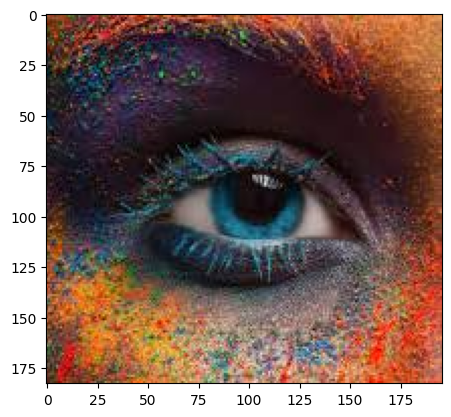

In [10]:
img =mpimg.imread('/content/input.jpeg')
plt.imshow(img)

In [11]:
img.shape

(183, 196, 3)



*   VISUALIZING THE 3 LAYERS OF TRUE IMAGE I.E R,B,G



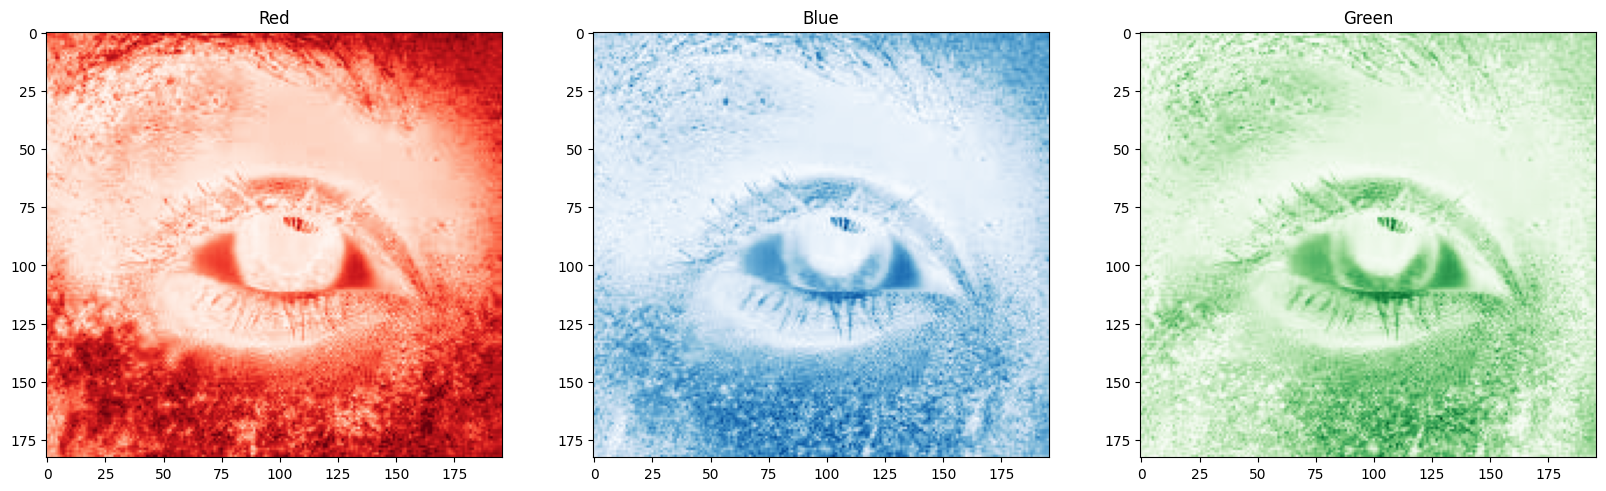

In [12]:
r=img[:,:,0]
b=img[:,:,1]
g=img[:,:,2]

f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,10))
ax1.set_title('Red')
ax1.imshow(r,cmap='Reds')
ax2.set_title('Blue')
ax2.imshow(b,cmap='Blues')
ax3.set_title('Green')
ax3.imshow(g,cmap='Greens')



*  CONVERTING RBG TO GREY SCALE IMAGE VIA cvtColor()




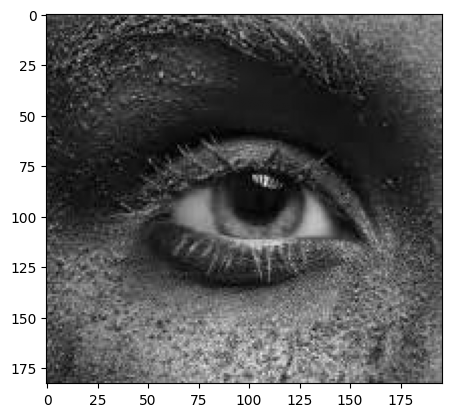

In [13]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

**WORKING ON MNIST DATASET**

In [14]:
from tensorflow.keras.datasets import mnist

(X_train,y_train),(X_test,y_test)=mnist.load_data()

print("The MNIST database has a training set of %d examples<"%len(X_train))
print("The MNIST database has a test set of %d examples<"%len(X_test))

The MNIST database has a training set of 60000 examples<
The MNIST database has a test set of 10000 examples<


In [15]:
X_train[0].shape

(28, 28)

In [16]:
X_train.shape

(60000, 28, 28)

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np





   

*   Viewing individual components of the mnist dataset





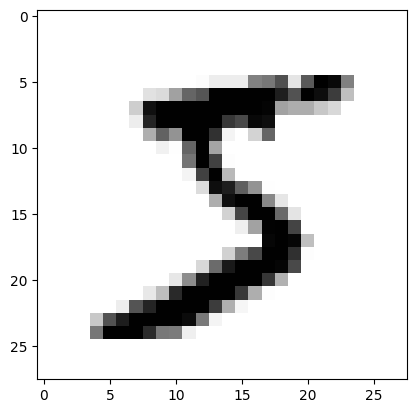

In [18]:
plt.imshow(X_train[0],cmap=cm.binary)
plt.show()

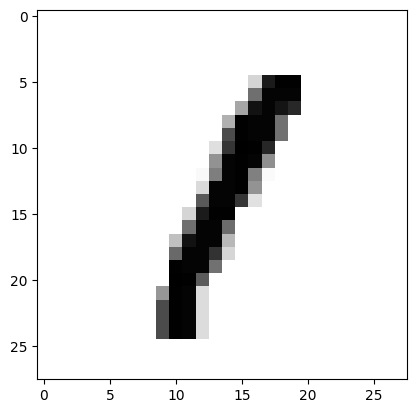

In [19]:
plt.imshow(X_train[77],cmap=cm.binary)
plt.show()

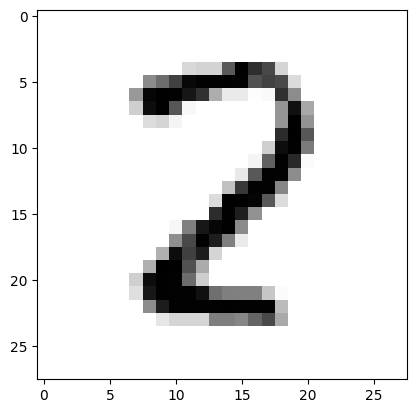

In [20]:
plt.imshow(X_train[1074],cmap=cm.binary)
plt.show()



*   trying to view multiple images at once



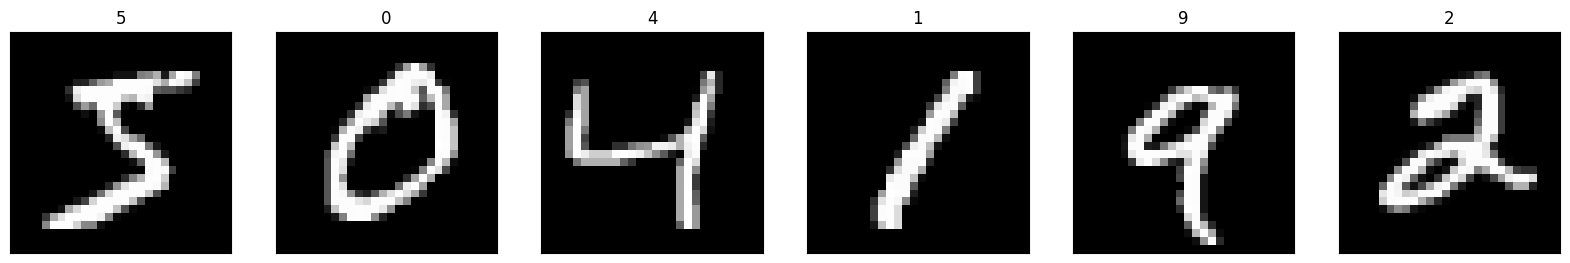

In [21]:
fig=plt.figure(figsize=(20,20))

for i in range(0, 6):
  ax=fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
  ax.imshow(X_train[i],cmap='gray')
  ax.set_title(str(y_train[i]))
plt.show()



*  converting dtypes and knowing the chapes pf x_Train and x_Test



In [22]:
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

print('X_train shape:',X_train.shape)
print(X_train.shape[0],'train samples')
print(X_test.shape[0],'test samples')


X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [23]:
X_test.shape

(10000, 28, 28)

In [24]:
X_train[0].min()

np.float32(0.0)

In [25]:
X_train[0].max()

np.float32(1.0)

In [26]:
y_train.ndim

1

In [27]:
y_train.shape

(60000,)

In [28]:
len(np.unique(y_train))

10



*   identifying what is y and what to apply over it like is it discrete continuous or what?



In [29]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)



*   reshaping x and y


In [30]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [31]:
X_train.shape

(60000, 28, 28, 1)

In [32]:
X_test.shape

(10000, 28, 28, 1)

In [33]:
X_train[0].ndim

3

In [34]:
import numpy as np
from  google.colab.patches import cv2_imshow
import cv2,os,json,random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.datasets import mnist
import matplotlib.cm as cm
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout

In [35]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [36]:
y_train.shape

(60000, 10)

In [37]:
y_train.shape

(60000, 10)

In [38]:
y_test.shape

(10000, 10)

In [39]:
y_test.ndim

2

**model creation**

In [41]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3),padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3),padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)




*   model compilation-loss function and optimizer



In [42]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])



*   model callbacks-earlystopping and checkpoint



In [43]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpointer = ModelCheckpoint(filepath='model.weights.best.keras', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)




*  model training


In [44]:

hist=model.fit(X_train,y_train,batch_size=64,epochs=15,validation_data=(X_test,y_test),callbacks=[checkpointer,early_stopping],verbose=2,shuffle=True)

Epoch 1/15

Epoch 1: val_loss improved from inf to 0.04333, saving model to model.weights.best.keras
938/938 - 45s - 48ms/step - accuracy: 0.9343 - loss: 0.2102 - val_accuracy: 0.9856 - val_loss: 0.0433
Epoch 2/15

Epoch 2: val_loss improved from 0.04333 to 0.03290, saving model to model.weights.best.keras
938/938 - 47s - 50ms/step - accuracy: 0.9790 - loss: 0.0723 - val_accuracy: 0.9890 - val_loss: 0.0329
Epoch 3/15

Epoch 3: val_loss improved from 0.03290 to 0.02903, saving model to model.weights.best.keras
938/938 - 45s - 48ms/step - accuracy: 0.9845 - loss: 0.0516 - val_accuracy: 0.9897 - val_loss: 0.0290
Epoch 4/15

Epoch 4: val_loss did not improve from 0.02903
938/938 - 80s - 86ms/step - accuracy: 0.9877 - loss: 0.0422 - val_accuracy: 0.9895 - val_loss: 0.0303
Epoch 5/15

Epoch 5: val_loss improved from 0.02903 to 0.02358, saving model to model.weights.best.keras
938/938 - 44s - 47ms/step - accuracy: 0.9890 - loss: 0.0382 - val_accuracy: 0.9917 - val_loss: 0.0236
Epoch 6/15

Epo


saving model weight



In [45]:
#model.load_weights('model.weights.best.keras')



*  model eval



In [46]:
lose,accuracy=model.evaluate(X_test,y_test,verbose=2)
print('Test loss:',lose)
print('Test accuracy:',accuracy)

313/313 - 2s - 8ms/step - accuracy: 0.9917 - loss: 0.0236
Test loss: 0.023578515276312828
Test accuracy: 0.9916999936103821


In [47]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 843,286 (3.22 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 421,644 (1.61 MB)